In [1]:
#导入 pandas 库 
import pandas as pd
# 读取 csv 数据，并保存为名称为 titanic_df 的对象 
titanic_df =pd.read_csv('./datasets/titanic/train.csv')
# 查看前 5 行 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# 直接在 titanic_df 中删掉指定的列：PassengerId,Name,Ticket
titanic_df =titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
# 查看删除指定列之后的数据前 5 行 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
# Survived（是否生还）频数分析
# 统计频数
Survived_freq = titanic_df.Survived.value_counts()
print(Survived_freq)

0    549
1    342
Name: Survived, dtype: int64


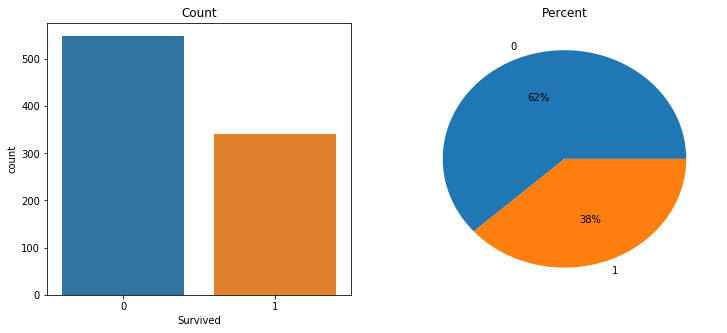

In [5]:
# 生成条图和饼图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(Survived_freq,labels=Survived_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [6]:
# Pclass（客舱等级）频数分析
# 统计频数
Pclass_freq = titanic_df.Pclass.value_counts()
print(Pclass_freq)

3    491
1    216
2    184
Name: Pclass, dtype: int64


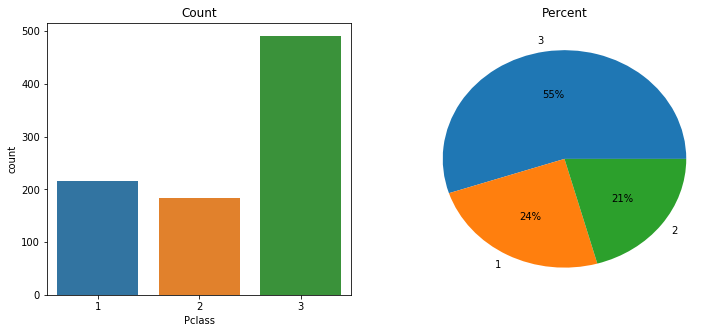

In [7]:
# 生成条图和饼图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(Pclass_freq,labels=Pclass_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

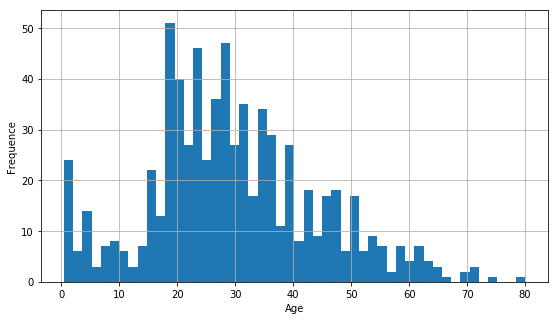

In [8]:
# Age（年龄）直方图分布
plt.figure(figsize=(20,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 50)
#使用 hist()方法，把 Age 划分为 50 个区间绘图
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

In [9]:
# 对所有数值型变量进行描述统计
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#统计 10%,20%...100%位置的分位数
titanic_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


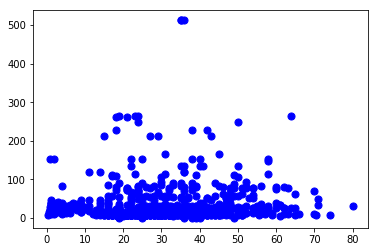

In [11]:
# 多变量数据探索-两个数值型
# 观察 Age 年龄和 Fare 船票价格两个数值型变量之间的关系
import matplotlib.pyplot as plt
plt.scatter(titanic_df.Age,titanic_df.Fare,50,"blue")
plt.show()

In [12]:
# 多变量数据探索-两个类别型变量分析
# Survived VS Pclass 交叉表，单元格内显示频数
pd.crosstab(titanic_df.Survived,titanic_df.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [13]:
# Survived VS Pclass 交叉表，单元格内显示行百分比（每一行的百分比加总=100%）
pd.crosstab(titanic_df.Survived,titanic_df.Pclass).apply(lambda r: r/r.sum(), axis=1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


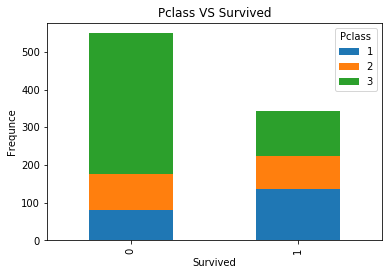

In [14]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(titanic_df.Survived,titanic_df.Pclass)
# 绘制堆栈条图
stacked=True
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()

In [15]:
# 多变量分析：类别变量和数值变量的相关性分析
# 按 Survived 汇总，求 Age 和 Fare 的均值
titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


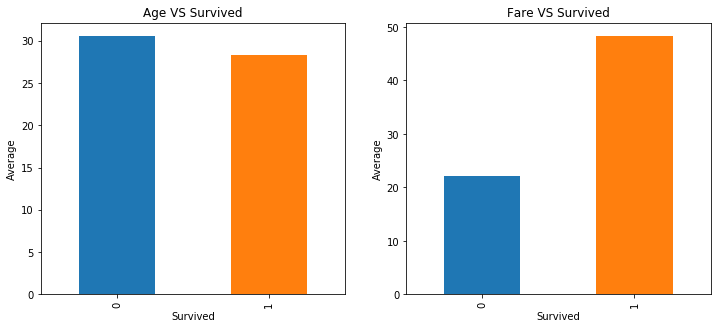

In [16]:
# 把上面分类汇总统计得到的均值通过图形的方式可视化展现出来
data = titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})
plt.figure(figsize = (12,5))
plt.subplot(121)
data.Age.plot(kind='bar')
plt.title("Age VS Survived")
plt.ylabel('Average')
plt.subplot(122)
data.Fare.plot(kind='bar')
plt.title("Fare VS Survived")
plt.ylabel('Average')
plt.show()

In [17]:
# 数据预处理-缺失值处理-删除缺失值
# 删除整个数据集中任何一个变量有缺失的记录
dropna = titanic_df.dropna()
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Fare        183 non-null float64
Cabin       183 non-null object
Embarked    183 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [18]:
# 对 Age 变量删除缺失值，保存为一个新的变量
Age_dropna = titanic_df[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 11.2 KB


In [19]:
# 数据预处理-缺失值处理-构造缺失值标识变量
# 构造一个新的变量 Age_isna,当 Age 是缺失值的时候 Age_isna=1，否则=0
titanic_df['Age_isna']=0
titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1
# 对 Age_isna 进行频数分析，确认 Age_isna 是否构造正确
titanic_df['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [20]:
# 数据预处理-缺失值处理-替换缺失值
## 对年龄缺失值进行均值填充
age_mean = round(titanic_df['Age'].mean())
titanic_df['Age'].fillna(age_mean, inplace=True)
titanic_df.Age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# 独热编码
import pandas as pd
# 把 Pclass 进行独热编码,保存为新的数据对象,名字叫 Pclass_onehot,prefix 参数设置独热编码后的变量名前缀
Pclass_onehot = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
# 查看前 5 行 
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [22]:
# 连续变量分箱: 自定义分箱
#对 Age 进行自定义分箱
cut_points = [0,18,25,40,60,100]
#定义分箱边界值
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)
#分箱后的新变量 Age_bin 继续保存在原始的数据对象 titanic_df 中
# 分箱后的频数分析
titanic_df["Age_bin"].value_counts()

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age_bin, dtype: int64

In [23]:
# 连续变量分箱: 等宽分箱
# 等宽分箱，分箱数为 10
titanic_df["Age_wbin"] = pd.cut(titanic_df.Age,10)
# 分箱后的频数分析
titanic_df["Age_wbin"].value_counts()

(24.294, 32.252]    346
(16.336, 24.294]    177
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age_wbin, dtype: int64

In [24]:
# 连续变量分箱: 等深分箱
# 使用 pandas 的 qcut()方法，直接指定等深分箱的数量，例如 5
# 等深分箱，分箱数为 5
titanic_df["Age_dbin"] = pd.qcut(titanic_df.Age,5)
# 分箱后的频数分析
titanic_df["Age_dbin"].value_counts()

(28.0, 30.0]     224
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(30.0, 38.0]     128
Name: Age_dbin, dtype: int64

In [25]:
# 查看一下分箱后的数据，我们看到了 Age_bin,Age_wbin,Age_dbin 三个分箱后的变量情况
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
5,0,3,male,30.0,0,0,8.4583,NaN,Q,1,"(25, 40]","(24.294, 32.252]","(28.0, 30.0]"
6,0,1,male,54.0,0,0,51.8625,E46,S,0,"(40, 60]","(48.168, 56.126]","(38.0, 80.0]"
7,0,3,male,2.0,3,1,21.0750,NaN,S,0,"(0, 18]","(0.34, 8.378]","(0.419, 20.0]"
8,1,3,female,27.0,0,2,11.1333,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
9,1,2,female,14.0,1,0,30.0708,NaN,C,0,"(0, 18]","(8.378, 16.336]","(0.419, 20.0]"


In [26]:
# 分箱后得到的变量就变成了类别型变量（这正是我们要分箱的目的），
#那么就可以用前面学到的独热编码的方法对分箱后的变量进行编码了。
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin,prefix='Age_bin')
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [27]:
# 数据预处理-标准化方式一
from sklearn import preprocessing
# 使用 Age 变量的数据训练一个标准化转换模型# 特别说明一下：需要使用 titanic_df[['Age']]
# 这样的方式来引用 Age 变量，这样得到的结果是 dataframe
# Age 标准化处理后保存为原数据对象中的新变量 Age_std
titanic_df['Age_std'] = preprocessing.scale(titanic_df[['Age']])
# 查看标准化后的数据 
titanic_df['Age_std'].head()

0   -0.597055
1    0.634162
2   -0.289251
3    0.403309
4    0.403309
Name: Age_std, dtype: float64

In [28]:
# 数据预处理-标准化方式二
from sklearn import preprocessing
# 实例化一个标准化转换器
stdscaler = preprocessing.StandardScaler()
# 使用Age变量的数据训练一个标准化转换模型
# 特别说明一下：需要使用titanic_df[['Age']]这样的方式来引用Age变量，这样得到的结果是dataframe，不是series
stdscaler.fit(titanic_df[['Age']])
# Age标准化处理后保存为原数据对象中的新变量Age_std
titanic_df['Age_std'] = stdscaler.transform(titanic_df[['Age']])
# 查看标准化后的数据
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309


In [29]:
# 标准化要做的事情就是把原始的连续型变量转换为均值为 0，标准差为 1 的变量
print(titanic_df['Age_std'].mean(axis=0))
print(titanic_df['Age_std'].std(axis=0))

8.940348150039841e-17
1.0005616400330424


In [30]:
from sklearn import preprocessing
# 实例化一个归一化转换器
minmaxscaler = preprocessing.MinMaxScaler()
# 使用 Age 变量的数据训练一个归一化转换模型
minmaxscaler.fit(titanic_df[['Age']])
# Age 归一化处理后保存为原数据对象中的新变量 Age_normal
titanic_df['Age_normal'] = minmaxscaler.transform(titanic_df[['Age']])
# 查看归一化后的数据 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531


In [31]:
# 使用 concat 把 Pclass_onehot 和 titanic_df 两个 dataframe 拼接在一起
titanic_df_merge = pd.concat([titanic_df,Pclass_onehot], axis=1)
titanic_df_merge.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,0,0,1


In [32]:
# 五、特征变量的构造和组合-基于多个变量运算构造新变量
# 构造 FamilySize 变量
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,FamilySize
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,2
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1


In [33]:
# FamilySize 与 Survived 的交叉表，显示频数
pd.crosstab(titanic_df.Survived,titanic_df.FamilySize,margins=True)

FamilySize,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


In [34]:
# FamilySize 与 Survived 的交叉表，显示列占比
pd.crosstab(titanic_df.Survived,titanic_df.FamilySize).apply(lambda r: r/r.sum(), axis=0)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


In [35]:
#  基于逻辑判断来构造新变量
# 构造一个新变量 IsAlone（是否独自一人)
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
# 频数统计
titanic_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [36]:
# 构造一个新变量 IsMother（是否是母亲）
titanic_df['IsMother'] = 0
titanic_df.loc[(titanic_df['Sex']=='female') & (titanic_df['Parch']>0) & (titanic_df['Age']>20),
'IsMother'] = 1
# 频数统计
titanic_df['IsMother'].value_counts()

0    816
1     75
Name: IsMother, dtype: int64

In [37]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,FamilySize,IsAlone,IsMother
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,2,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,2,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,1,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,2,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1,1,0


In [38]:
#多个特征变量进行组合
#对 Age 进行自定义分箱 
cut_points = [0,18,25,40,60,100] 
#定义分箱边界值
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)
#分箱后的新变量 Age_bin 继续保存在原始的数据对象 titanic_df 中
# 分箱后的频数分析
titanic_df["Age_bin"].value_counts()

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age_bin, dtype: int64

In [39]:
# 把 Sex 性别和 Age_bin 特征进行组合
titanic_df['Sex_Age_combo'] = titanic_df['Sex'] + "_" + titanic_df['Age_bin'].astype(str)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,FamilySize,IsAlone,IsMother,Sex_Age_combo
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,2,0,0,"male_(18, 25]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,2,0,0,"female_(25, 40]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,1,1,0,"female_(25, 40]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,2,0,0,"female_(25, 40]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1,1,0,"male_(25, 40]"


In [40]:
# 对 Sex_Age_combo 进行独热编码
Sex_Age_combo_onehot = pd.get_dummies(titanic_df['Sex_Age_combo'], prefix='Sex_Age')
Sex_Age_combo_onehot.head()

,"Sex_Age_female_(0, 18]","Sex_Age_female_(18, 25]","Sex_Age_female_(25, 40]","Sex_Age_female_(40, 60]","Sex_Age_female_(60, 100]","Sex_Age_male_(0, 18]","Sex_Age_male_(18, 25]","Sex_Age_male_(25, 40]","Sex_Age_male_(40, 60]","Sex_Age_male_(60, 100]"
0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
